In [1]:
import pandas as pd
import numpy as np
import os
import xgboost as xgb

In [2]:
from sklearn.model_selection import train_test_split

# get the data

In [3]:
curr_dir = os.getcwd()
curr_dir

'C:\\Users\\User\\Documents\\Ruppin\\med_services_israel'

In [4]:
# read table:
table_path = os.path.join(curr_dir, 'Model-Matrix_Update_MissingValues.csv')
table = pd.read_csv(table_path)
table = table.set_index("English_name")
print(table.shape)
table.head()

(253, 27)


,sumWeeklyHealthHours,SumPopulation,SumPopulation_CompletedFromExternalData,NumberOfCities_smaller35km,Jewish_precent,Arab_precent,Jewish_Arabs_precent_CompletedFromExternalData,precentPopulation_over20,ClalitPrecent_fromTatal,ClalitPrecent_fromTatal_CompletedFromExternalData,...,SocioeconomicStatusֹ_CompletedFromExternalData,periphery,Jerusalem_district,North_district,Center_district,Haifa_district,TLV_district,South_district,Clinic_hours_for_1000_people,Clinic_hours_for_1000_people_bigger9
English_name,,,,,,,,,,,,,,,,,,,,,
ABU GHOSH,104.0000,7880,0,60,0.0,98.90,0,64.5,86.6,0,...,0,1,1,0,0,0,0,0,13.197970,0
ABU SINAN,359.5000,14455,0,70,0.0,99.80,0,68.5,62.9,0,...,0,1,0,1,0,0,0,0,24.870287,0
EVEN YEHUDA,157.4996,14266,0,47,98.3,1.07,0,65.1,42.2,0,...,1,0,0,0,1,0,0,0,11.040207,0
UMM AL-FAHM,759.0830,57677,0,108,0.0,99.90,0,60.1,71.3,1,...,1,1,0,0,0,1,0,0,13.160931,0
OFAQIM,748.8333,33999,0,25,93.4,0.00,0,62.9,66.6,0,...,0,1,0,0,0,0,0,1,22.025157,0


In [5]:
for col in table.select_dtypes(include='object').columns:
    table[col] = table[col].astype('category')

# Verify the changes
print(table.dtypes)

sumWeeklyHealthHours                                   float64
SumPopulation                                            int64
SumPopulation_CompletedFromExternalData                  int64
NumberOfCities_smaller35km                               int64
Jewish_precent                                         float64
Arab_precent                                           float64
Jewish_Arabs_precent_CompletedFromExternalData           int64
precentPopulation_over20                               float64
ClalitPrecent_fromTatal                                float64
ClalitPrecent_fromTatal_CompletedFromExternalData        int64
MacabiPrecent_fromTatal                                float64
MacabiPrecent_fromTatal_CompletedFromExternalData        int64
MeuhedetPrecent_fromTatal                              float64
MeuhedetPrecent_fromTatal_CompletedFromExternalData      int64
LeumitPrecent_fromTatal                                float64
LeumitPrecent_fromTatal_CompletedFromExternalData      

In [6]:
table.columns

Index(['sumWeeklyHealthHours', 'SumPopulation',
       'SumPopulation_CompletedFromExternalData', 'NumberOfCities_smaller35km',
       'Jewish_precent', 'Arab_precent',
       'Jewish_Arabs_precent_CompletedFromExternalData',
       'precentPopulation_over20', 'ClalitPrecent_fromTatal',
       'ClalitPrecent_fromTatal_CompletedFromExternalData',
       'MacabiPrecent_fromTatal',
       'MacabiPrecent_fromTatal_CompletedFromExternalData',
       'MeuhedetPrecent_fromTatal',
       'MeuhedetPrecent_fromTatal_CompletedFromExternalData',
       'LeumitPrecent_fromTatal',
       'LeumitPrecent_fromTatal_CompletedFromExternalData',
       'SocioeconomicStatusֹ',
       'SocioeconomicStatusֹ_CompletedFromExternalData', 'periphery',
       'Jerusalem_district', 'North_district', 'Center_district',
       'Haifa_district', 'TLV_district', 'South_district',
       'Clinic_hours_for_1000_people', 'Clinic_hours_for_1000_people_bigger9'],
      dtype='object')

# split the data to train-val and test

In [7]:
# split to test and train-val:
X = table.drop(["Clinic_hours_for_1000_people", "Clinic_hours_for_1000_people_bigger9", "sumWeeklyHealthHours"], axis=1)
y = table["Clinic_hours_for_1000_people_bigger9"]

# Split the dataset with stratification
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Print the shape of the resulting splits to verify
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)




X_train shape: (202, 24)
X_test shape: (51, 24)
y_train shape: (202,)
y_test shape: (51,)


In [8]:
# compare the distribution of 0,1 in the target vector of the train-val and the test splits
y_train.value_counts(dropna=False, normalize=True)

Clinic_hours_for_1000_people_bigger9
0    0.851485
1    0.148515
Name: proportion, dtype: float64

In [9]:
y_test.value_counts(dropna=False, normalize=True)

Clinic_hours_for_1000_people_bigger9
0    0.862745
1    0.137255
Name: proportion, dtype: float64

the precents are similar!

In [10]:
# todo: compare other parameters: district, authority population, socio economic etc. 

# hyper-parameter tuning using random search strategy:

In [11]:
import shap
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold
from sklearn.metrics import make_scorer, f1_score
from scipy.stats import uniform, randint


In [12]:
# Define the parameter distributions to sample from with more regularization and simpler model complexity
param_dist = {
    'eta': uniform(0.01, 0.1),  # lower learning rate
    'max_depth': randint(2, 5),  # lower max depth
    'min_child_weight': randint(5, 15),  # higher min child weight
    'subsample': uniform(0.6, 0.4),  # slightly lower subsample ratio
    'colsample_bytree': uniform(0.6, 0.4),  # slightly lower column sample ratio
    'gamma': uniform(0.1, 0.3),  # higher gamma for regularization
    'lambda': uniform(1, 3),  # higher L2 regularization
    'alpha': uniform(0.5, 1)  # higher L1 regularization
}

# Initialize the XGBoost classifier with early stopping
xgb_model = xgb.XGBClassifier(objective='binary:logistic', eval_metric='logloss', use_label_encoder=False, seed=42)

# Define custom scorer for F1
f1_scorer = make_scorer(f1_score)

# Define the StratifiedKFold cross-validator
stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [13]:
# Perform random search with cross-validation
random_search = RandomizedSearchCV(estimator=xgb_model, param_distributions=param_dist, n_iter=100, scoring=f1_scorer, cv=stratified_kfold, verbose=1, random_state=42)

# Fit the random search to the training data with early stopping
# Fit the grid search to the training data
random_search.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric='logloss',
                                           feature_types=None, gamma=None,
                                           grow_policy=None,
                                           imp...
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001C4716D3FE0>,
                                        'min_child_weight': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001C46C335370>,
                                        'subsample': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x000001C4716F8290>},
                   random_state=42,
                   scoring=make_scorer(f1_score, response_method='predict'),
                   verbose=1)

In [14]:
# Get the best model based on F1 score
best_model = random_search.best_estimator_

# Save the best model
best_model_path = os.path.join(os.getcwd(), 'students models', 'best_xgboost_model.json')
best_model.save_model(best_model_path)

# Print best model parameters
print("Best model parameters:", random_search.best_params_)

Best model parameters: {'alpha': 1.0081987767407186, 'colsample_bytree': 0.8783251227163527, 'eta': 0.09583588048137198, 'gamma': 0.19778767156056543, 'lambda': 1.660723142696645, 'max_depth': 3, 'min_child_weight': 7, 'subsample': 0.9238004184558861}


In [15]:
decision_threshold = 0.1

In [16]:
# evaluate the model: recall, precision, F1, roc-auc, pr-auc
from sklearn.metrics import recall_score, precision_score, f1_score, roc_auc_score, average_precision_score, confusion_matrix

# Predict the probabilities of the training set
y_train_pred_prob = best_model.predict(X_train)
y_train_pred = (y_train_pred_prob >decision_threshold).astype(int)
pd.DataFrame(y_train_pred).describe()

,0
count,202.000000
mean,0.044554
std,0.206836
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [64]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import make_scorer, recall_score, precision_score, f1_score

# Define the parameters to tune
param_grid = {
     'objective': ['binary:logistic'],
    'eval_metric': ['logloss'],
    'eta': [0.01, 0.1, 0.2],
    'max_depth': [1, 3, 6, 9],
    'min_child_weight': [1, 5, 10],
    'subsample': [0.5, 0.7, 1.0],
    'colsample_bytree': [0.5, 0.7, 1.0],
    'gamma': [0, 0.1, 0.2],
    'lambda': [1, 1.5, 2, 3],
    'alpha': [0, 0.1, 0.2, 0.4]
}




In [65]:
# Initialize the XGBoost classifier
xgb_model = xgb.XGBClassifier(objective='binary:logistic', eval_metric='logloss', use_label_encoder=False, seed=42)



In [75]:
# Define custom scorers for recall and precision
# scorers = {
#     'recall_score': make_scorer(recall_score),
#     'precision_score': make_scorer(precision_score)
# }

# scorers = {
#     'f1 scorer': make_scorer(f1_score),
# }

# Perform grid search with cross-validatio
nfolds = 10
random_search = RandomizedSearchCV(estimator=xgb_model, param_distributions=param_grid, scoring=make_scorer(f1_score), cv=nfolds, verbose=1, n_iter=100, )
# Fit the grid search to the training data
random_search.fit(X_train, y_train)



Fitting 10 folds for each of 100 candidates, totalling 1000 fits


RandomizedSearchCV(cv=10,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric='logloss',
                                           feature_types=None, gamma=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learnin...
                   n_iter=100,
                   param_distributions={'alpha': [0, 0.1, 0.2, 0.4],
                                        'colsample_bytree': [0.5, 0.7, 1.0],
                                        'eta': [0.01, 0.1, 0.2],
                                        'eval_metric': ['logloss'],
                                        'gamma': [0, 0.1, 0.2],
                                        'lambda': [1, 1.5, 2, 3],
                                        'max_depth': [1, 3, 6, 9],
                                        'min_child_weight': [1, 5, 10],
                                        'objective': ['binary:logistic'],
                                        'subsample': [0.5, 0.7, 1.0]},
                   scoring=make_scorer(f1_score, response_method='predict'),
                   verbose=1)

In [76]:

results = random_search.cv_results_

results2 = zip(results['mean_test_score'],  results['params'])
# 
# Print the recall and precision for each parameter combination
for f1, params in results2:
    print(f"f1: {f1},  Params: {params}")



f1: 0.63,  Params: {'subsample': 1.0, 'objective': 'binary:logistic', 'min_child_weight': 1, 'max_depth': 1, 'lambda': 2, 'gamma': 0, 'eval_metric': 'logloss', 'eta': 0.1, 'colsample_bytree': 1.0, 'alpha': 0.2}
f1: 0.0,  Params: {'subsample': 0.5, 'objective': 'binary:logistic', 'min_child_weight': 5, 'max_depth': 9, 'lambda': 2, 'gamma': 0.1, 'eval_metric': 'logloss', 'eta': 0.01, 'colsample_bytree': 0.5, 'alpha': 0.1}
f1: 0.0,  Params: {'subsample': 0.7, 'objective': 'binary:logistic', 'min_child_weight': 10, 'max_depth': 9, 'lambda': 2, 'gamma': 0.1, 'eval_metric': 'logloss', 'eta': 0.1, 'colsample_bytree': 0.5, 'alpha': 0.4}
f1: 0.0,  Params: {'subsample': 0.7, 'objective': 'binary:logistic', 'min_child_weight': 10, 'max_depth': 1, 'lambda': 1, 'gamma': 0.2, 'eval_metric': 'logloss', 'eta': 0.2, 'colsample_bytree': 0.7, 'alpha': 0}
f1: 0.0,  Params: {'subsample': 0.7, 'objective': 'binary:logistic', 'min_child_weight': 5, 'max_depth': 6, 'lambda': 3, 'gamma': 0.1, 'eval_metric': 'l

In [77]:
# Get the best model based on recall score
best_model = random_search.best_estimator_



In [78]:
# Save the best model
best_model_path = os.path.join(os.getcwd(), 'students models', 'best_xgboost_model.json')
best_model.save_model(best_model_path)

# Print best model parameters
print("Best model parameters:", random_search.best_params_)

Best model parameters: {'subsample': 1.0, 'objective': 'binary:logistic', 'min_child_weight': 1, 'max_depth': 3, 'lambda': 1, 'gamma': 0.1, 'eval_metric': 'logloss', 'eta': 0.2, 'colsample_bytree': 1.0, 'alpha': 0}


In [84]:
decision_threshold = 0.5

In [85]:
# evaluate the model: recall, precision, F1, roc-auc, pr-auc
from sklearn.metrics import recall_score, precision_score, f1_score, roc_auc_score, average_precision_score, confusion_matrix

# Predict the probabilities of the training set
y_train_pred_prob = best_model.predict(X_train)
y_train_pred = (y_train_pred_prob >decision_threshold).astype(int)
pd.DataFrame(y_train_pred).describe()


,0
count,202.000000
mean,0.148515
std,0.356493
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [17]:
# Predict the probabilities of the test set
y_test_pred_prob = best_model.predict(X_test)
y_test_pred = (y_test_pred_prob >decision_threshold).astype(int)
pd.DataFrame(y_test_pred).describe()

,0
count,51.0
mean,0.0
std,0.0
min,0.0
25%,0.0
50%,0.0
75%,0.0
max,0.0


In [18]:
# Calculate the metrics for the train set:
recall = recall_score(y_train, y_train_pred)
precision = precision_score(y_train, y_train_pred)
f1 = f1_score(y_train, y_train_pred)
roc_auc = roc_auc_score(y_train, y_train_pred_prob)
pr_auc = average_precision_score(y_train, y_train_pred_prob)

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_train, y_train_pred)

# Print the results
print(f"Recall: {recall}")
print(f"Precision: {precision}")
print(f"F1 Score: {f1}")
print(f"ROC-AUC: {roc_auc}")
print(f"PR-AUC: {pr_auc}")
print("Confusion Matrix:")
print(conf_matrix)






Recall: 0.23333333333333334
Precision: 0.7777777777777778
F1 Score: 0.358974358974359
ROC-AUC: 0.6108527131782946
PR-AUC: 0.2953428676200953
Confusion Matrix:
[[170   2]
 [ 23   7]]


In [88]:
# Calculate the metrics for the test set:
recall = recall_score(y_test, y_test_pred)
precision = precision_score(y_test, y_test_pred)
f1 = f1_score(y_test, y_test_pred)
roc_auc = roc_auc_score(y_test, y_test_pred_prob)
pr_auc = average_precision_score(y_test, y_test_pred_prob)

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_test_pred)

# Print the results
print(f"Recall: {recall}")
print(f"Precision: {precision}")
print(f"F1 Score: {f1}")
print(f"ROC-AUC: {roc_auc}")
print(f"PR-AUC: {pr_auc}")
print("Confusion Matrix:")
print(conf_matrix)






Recall: 0.42857142857142855
Precision: 0.6
F1 Score: 0.5
ROC-AUC: 0.6915584415584416
PR-AUC: 0.3355742296918767
Confusion Matrix:
[[42  2]
 [ 4  3]]


In [89]:
import shap

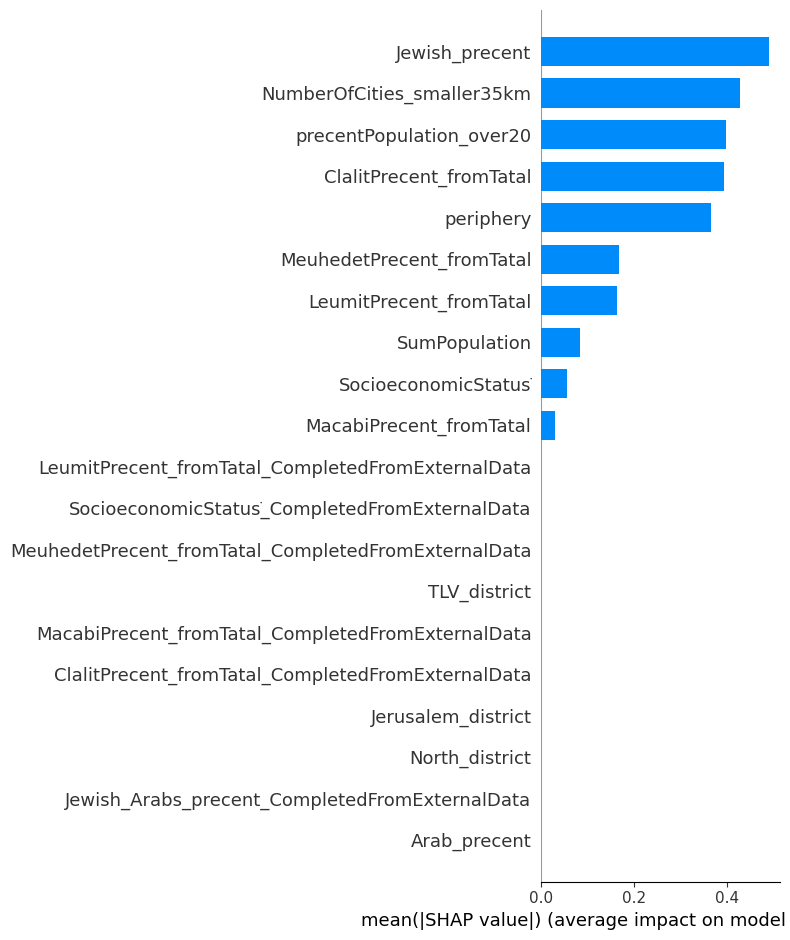

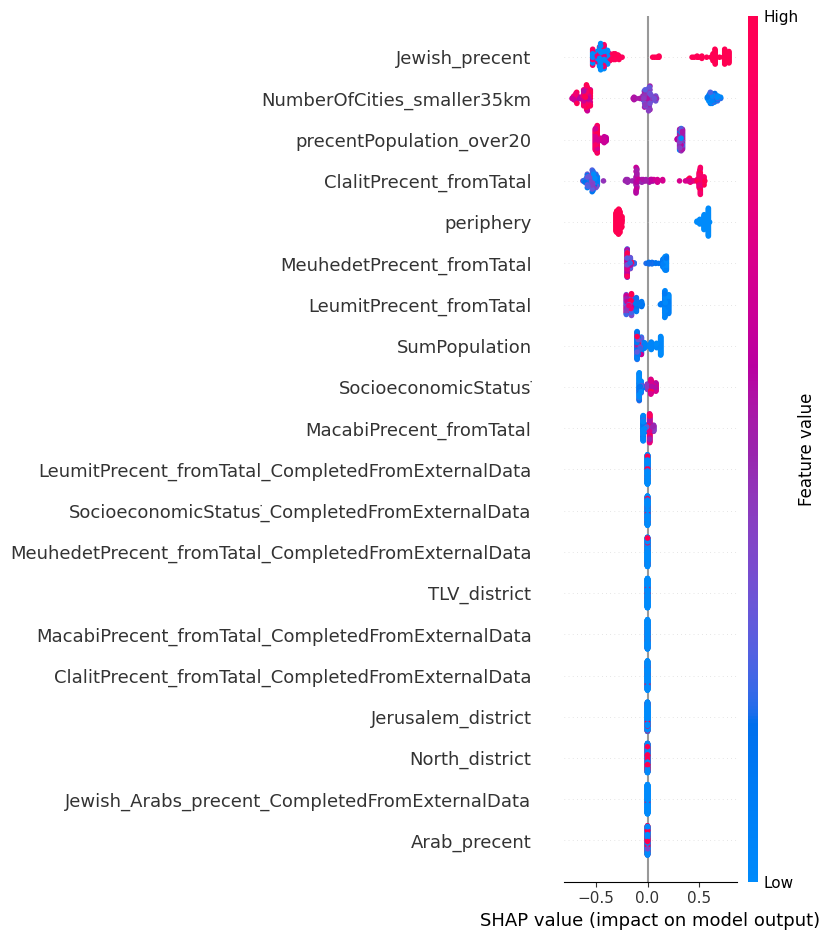

In [19]:
# Perform SHAP analysis
# Initialize the SHAP explainer
explainer = shap.TreeExplainer(best_model)

# Calculate SHAP values
shap_values = explainer.shap_values(X_train)

# Plot the summary of feature importance
shap.summary_plot(shap_values, X_train, plot_type="bar")

# Plot detailed feature importance
shap.summary_plot(shap_values, X_train)

In [ ]:

3